Import python packages

In [44]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline

Uploading CSV data

In [45]:
my_data = pd.read_csv('drug200.csv', delimiter=',')
my_data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


Pre-Processing the data 
As the colum names will not be counting we have to remove it
And Sex,Bp and Cholestor are nominal value not numeric we have to convert them into Numeric value

In [46]:
X = my_data[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']].values
X[0:5]

array([[23, 'F', 'HIGH', 'HIGH', 25.355],
       [47, 'M', 'LOW', 'HIGH', 13.093],
       [47, 'M', 'LOW', 'HIGH', 10.113999999999999],
       [28, 'F', 'NORMAL', 'HIGH', 7.797999999999999],
       [61, 'F', 'LOW', 'HIGH', 18.043]], dtype=object)

In [47]:
#Finding out the nomianl values to convert into numeric values
print(my_data['Sex'].unique())
print(my_data['BP'].unique())
print(my_data['Cholesterol'].unique())

['F' 'M']
['HIGH' 'LOW' 'NORMAL']
['HIGH' 'NORMAL']


In [48]:
le_sex = preprocessing.LabelEncoder()
le_sex.fit_transform(['F','M'])
X[:,1] = le_sex.transform(X[:,1])

le_bp = preprocessing.LabelEncoder()
le_bp.fit_transform(['HIGH','LOW','NORMAL'])
X[:,2] = le_bp.transform(X[:,2])

le_chol = preprocessing.LabelEncoder()
le_chol.fit_transform(['HIGH','NORMAL'])
X[:,3] = le_chol.transform(X[:,3])

X[0:5]

array([[23, 0, 0, 0, 25.355],
       [47, 1, 1, 0, 13.093],
       [47, 1, 1, 0, 10.113999999999999],
       [28, 0, 2, 0, 7.797999999999999],
       [61, 0, 1, 0, 18.043]], dtype=object)

Setting Up the prediction column

In [49]:
Y = my_data['Drug']
Y[0:5]

0    drugY
1    drugC
2    drugC
3    drugX
4    drugY
Name: Drug, dtype: object

Split the data into train and test datasets

In [50]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=0)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(160, 5)
(160,)
(40, 5)
(40,)


In [51]:
drugDTree = DecisionTreeClassifier(criterion='entropy', max_depth=4)
drugDTree

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [52]:
drugDTree.fit(X_train,Y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

Prediction time

In [53]:
y_pred = drugDTree.predict(X_test)

In [54]:
print('Real Data', Y_test[0:5])
print('Predicted Data', y_pred[0:5])


Real Data 18     drugC
170    drugX
107    drugY
98     drugY
177    drugY
Name: Drug, dtype: object
Predicted Data ['drugC' 'drugX' 'drugY' 'drugY' 'drugY']


Accuracy of the data

In [55]:
print('Accuracy Score:',accuracy_score(Y_test,y_pred))

Accuracy Score: 1.0


Visualization

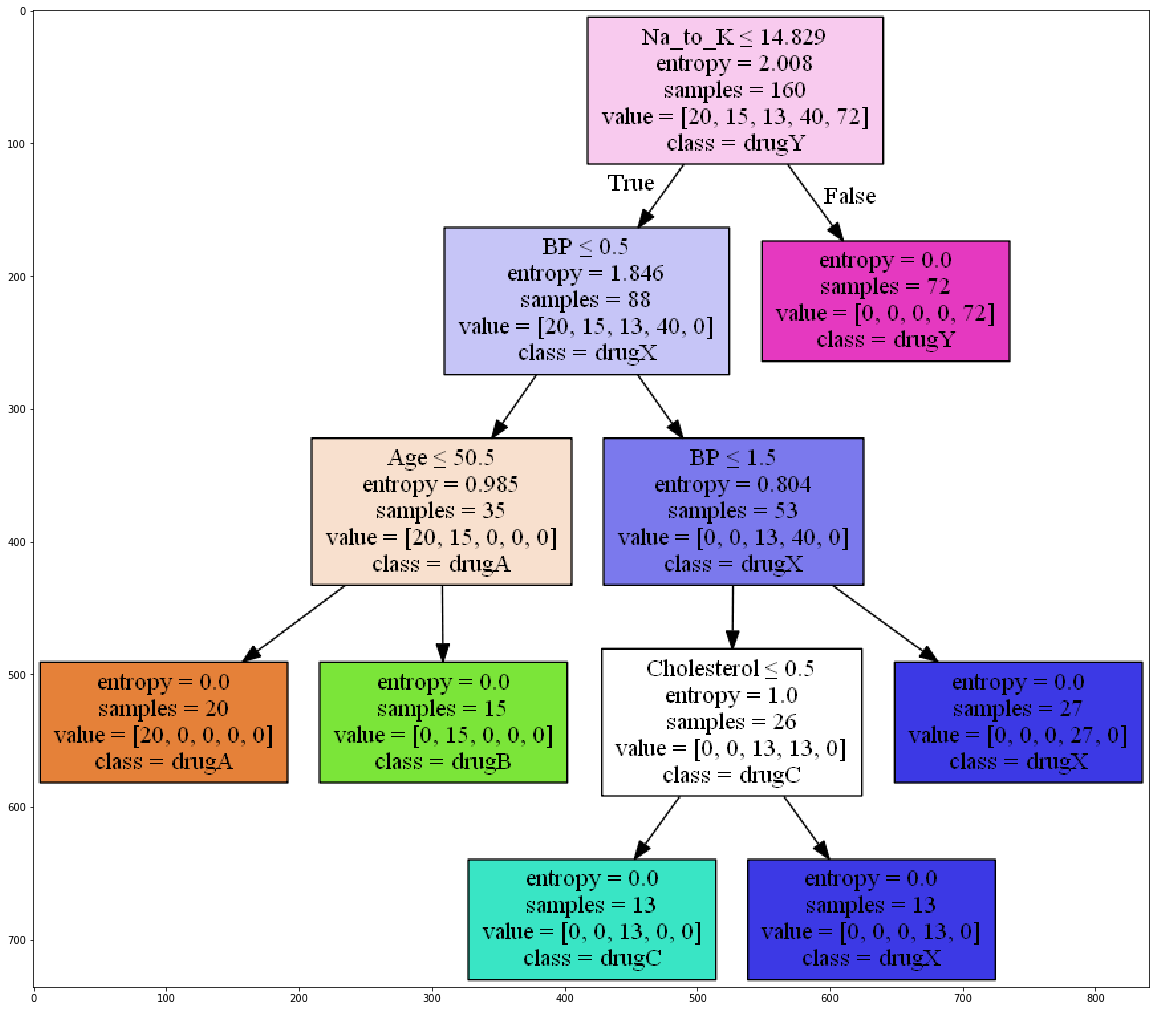

In [56]:
dot_data = StringIO()
file_name = 'DrugPredicton.png'
featuresName = my_data.columns[0:5]
predicted = my_data['Drug'].unique().tolist()
out=tree.export_graphviz(drugDTree,feature_names=featuresName, out_file=dot_data, class_names= np.unique(Y_train), filled=True, special_characters=True,rotate=False)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png(file_name)
img = mpimg.imread(file_name)
plt.figure(figsize=(20,40))
plt.imshow(img, interpolation='nearest')


Predicting accuracy manually

In [91]:
confusion = confusion_matrix(Y_test, y_pred)
i=0
for var in confusion:

    tn=var[0]
    fp=var[1]
    fn=var[2]
    tp=var[3]
    
    accuracy=(tp+tn)/(tn+fp+fn+fp)
    print(accuracy)
    break
   
    

1.0
